In [1]:
import sudoku
import random, copy
import sys
from PyQt5.QtWidgets import QMainWindow,QSpinBox,QMessageBox, QApplication, QLabel, QComboBox, QPushButton, QWidget, QAction, QTableWidget, QTableWidgetItem, QVBoxLayout
from PyQt5.QtGui import QIcon, QColor
from PyQt5.QtCore import pyqtSlot
Level = 50

class App(QWidget):
    def __init__(self):
        super().__init__()
        self.title = 'Sudoku Puzzle'
        self.left = 0
        self.top = 0
        self.width = 950
        self.height = 450
        self.initUI()
    def initUI(self):
        self.setWindowTitle(self.title)
        self.setGeometry(self.left, self.top, self.width, self.height)
        # Add Label
        
        self.createTable()
        
        # Add Push button
        
        self.layout = QVBoxLayout()
        self.layout.addWidget(self.label)
        self.layout.addWidget(self.level)
        self.layout.addWidget(self.tableWidget)
        self.layout.addWidget(self.button1)
        self.layout.addWidget(self.button)
        self.setLayout(self.layout)

        self.show()
    @pyqtSlot()
    def on_submit(self):
        def print_grid(arr):
            for i in range(9):
                for j in range(9):
                    self.tableWidget.setItem(i,j, QTableWidgetItem(str(arr[i][j])))

        def find_empty_location(arr,l):
            for row in range(9):
                for col in range(9):
                    if arr[row][col] == 0:
                        l[0]=row
                        l[1]=col
                        return True
            return False

        def used_in_row(arr,row,num):
            for i in range(9):
                if arr[row][i] == num:
                    return True
            return False

        def used_in_col(arr,col,num):
            for i in range(9):
                if arr[i][col] == num:
                    return True
            return False

        def used_in_box(arr,row,col,num):
            for i in range(3):
                for j in range(3):
                    if arr[i+row][j+col] == num:
                        return True
            return False

        def check_location_is_safe(arr,row,col,num):
            return not used_in_box(arr,row-row%3,col-col%3,num) and not used_in_col(arr,col,num) and not used_in_row(arr,row,num)

        def solve_sudoku(arr):
            l = [0,0]

            if not find_empty_location(arr,l):
                return True

            row = l[0]
            col = l[1]

            for num in range(1,10):
                if check_location_is_safe(arr,row,col,num):
                    arr[row][col]=num

                    if solve_sudoku(arr):
                        return True
                    arr[row][col] = 0

            return False

        box = []
        for i in range(9):
            sub_box = []
            for j in range(9):
                if self.tableWidget.item(i,j).text():
                    sub_box.append(int(self.tableWidget.item(i,j).text()))
                else:
                    sub_box.append(0)
            box.append(sub_box)
        if solve_sudoku(list(box)):
            print_grid(box)
    def difficultyLevel(self,text):
        global Level
        if text == "Easy":
            Level = 50
        elif text == "Medium":
            Level = 35
        elif text == "Hard":
            Level = 28
        
    def createTable(self):
        self.tableWidget = QTableWidget()
        self.label = QLabel('Sudoku')
        self.label.move(100,100)
        
        self.level = QComboBox()
        self.level.addItem("Easy")
        self.level.addItem("Medium")
        self.level.addItem("Hard")
        self.level.move(20,20)
        self.level.activated[str].connect(self.difficultyLevel)
        
        self.tableWidget.setRowCount(9)
        self.tableWidget.setColumnCount(9)
        self.tableWidget.horizontalHeader().setStretchLastSection(True)
#         self.tableWidget.resizeColumnsToContents()
        for i in range(9):
            for j in range(9):
                self.tableWidget.setItem(i,j, QTableWidgetItem(i))
        self.tableWidget.move(200,200)
       
        # Solve Button
        self.button = QPushButton('Solve')
        self.button.move(0,0)
        self.button.clicked.connect(self.on_submit)
        
        # Sudoku Generator button
        self.button1 = QPushButton('New Game')
        self.button1.move(0,0)
        self.button1.clicked.connect(self.generate)
    @pyqtSlot()
    def generate(self):
        results = [[0 for x in range(9)] for y in range(9)]
        for i in range(9):
            for j in range(9):
                    self.tableWidget.setItem(i,j, QTableWidgetItem())
        sudoku1 = []
        results = sudoku.run(n=Level)
        
        sudoku1 = sudoku.best(results)
        for i in range(9):
            for j in range(9):
                if sudoku1[i][j]:
                    self.tableWidget.setItem(i,j, QTableWidgetItem(str(sudoku1[i][j])))
        
if __name__ == '__main__':
    app = QApplication(sys.argv)
    ex = App()
    sys.exit(app.exec())
    


SystemExit: 0

/home/mirror/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3275: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


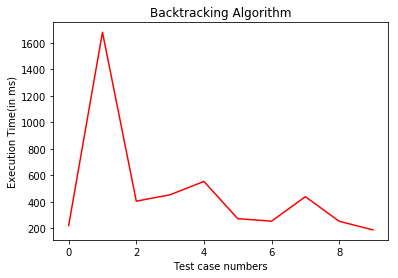

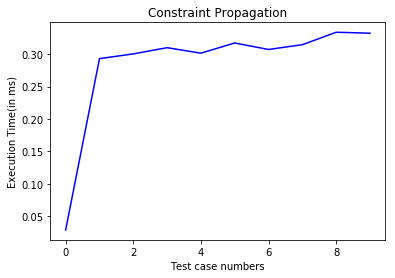

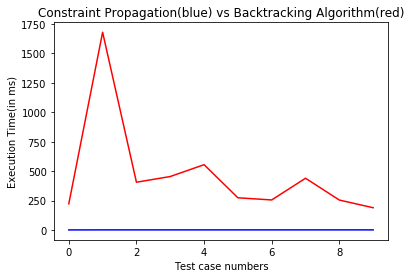

Constraint Propagation algorithm is  4725.2603128982355  times faster than Backtracking algorithm
Backtracking Time list(in ms):  [221.6313619230002, 1680.1492657830001, 405.3955645620008, 453.8838859030011, 554.4169144129996, 273.3219501759959, 254.6996929460047, 439.2951429790028, 253.8544155599975, 188.6149567750026]
Constraint Propagation Time list(in ms):  [0.028847462000499036, 0.292974232994311, 0.30033217999880435, 0.309889009006838, 0.3014003929984028, 0.31714924400330347, 0.3070743959979154, 0.31452170300235593, 0.33369243499782897, 0.332240715003536]


In [16]:
# Backtracking Algorithm
import matplotlib.pyplot as plt
import time
from tabulate import tabulate

def print_grid(arr):
    for i in range(9):
        for j in range(9):
            print(arr[i][j])
        print('\n')

def find_empty_location(arr,l):
    for row in range(9):
        for col in range(9):
            if arr[row][col] == 0:
                l[0]=row
                l[1]=col
                return True
    return False

def used_in_row(arr,row,num):
    for i in range(9):
        if arr[row][i] == num:
            return True
    return False

def used_in_col(arr,col,num):
    for i in range(9):
        if arr[i][col] == num:
            return True
    return False

def used_in_box(arr,row,col,num):
    for i in range(3):
        for j in range(3):
            if arr[i+row][j+col] == num:
                return True
    return False

def check_location_is_safe(arr,row,col,num):
    return not used_in_box(arr,row-row%3,col-col%3,num) and not used_in_col(arr,col,num) and not used_in_row(arr,row,num)

def solve_sudoku(arr):
    l = [0,0]

    if not find_empty_location(arr,l):
        return True

    row = l[0]
    col = l[1]

    for num in range(1,10):
        if check_location_is_safe(arr,row,col,num):
            arr[row][col]=num

            if solve_sudoku(arr):
                return True
            arr[row][col] = 0

    return False

def print_grid(arr):
    pass
    

if __name__ == '__main__':
#     test_case = 1011
    test_case = 2
    k = 0
    test_time_list = []
    with open('easy_sudokus.txt') as f:
        for line in f:
            if k < test_case:
                grid2 = []
                sub_line = []
                sub_line2 = []
                for i in range(81):
                    sub_line2.append(line[i])
                    if i%9 == 8:
                        sub_line.append(sub_line2)
                        sub_line2 = []          

                for i in range(9):
                    grid3 = []
                    for j in range(9):
                        if sub_line[i][j] != '.':
                            grid3.append(int(sub_line[i][j]))
                        else:
                            grid3.append(0)
                    grid2.append(grid3)
                
                if k%100 == 0:
                    test_time_list.append(sum(time_list))
                    time_list = []
                    
                start = time.process_time()
                if(solve_sudoku(list(grid2))):
                    print_grid(grid2)
                else:
                    print("No Solution Exists.")
                end = time.process_time()
                time_list.append(end-start)
                k += 1
                
    def cross(A,B):
        return [a+b for a in A for b in B]

    digits = '123456789'
    rows = 'ABCDEFGHI'
    cols = digits
    squares = cross(rows,cols)
    unitlist = ([cross(rows,c) for c in cols] + 
                [cross(r,cols) for r in rows] +
                [cross(rs,cs) for rs in ('ABC','DEF','GHI') for cs in ('123','456','789')])
    units = dict((s, [u for u in unitlist if s in u]) for s in squares)

    peers = dict((s,set(sum(units[s],[]))-set([s])) for s in squares)

    def test():
        assert len(squares) == 81
        assert len(unitlist) == 27
        assert all(len(units[s]) == 3 for s in squares)
        assert all(len(peers[s]) == 20 for s in squares)
        assert units['C2'] == [['A2','B2','C2','D2','E2','F2','G2','H2','I2'],
                              ['C1','C2','C3','C4','C5','C6','C7','C8','C9'],
                              ['A1','A2','A3','B1','B2','B3','C1','C2','C3']]
        assert peers['C2'] == set(['A2','B2','D2','E2','F2','G2','H2','I2',
                                  'C1','C3','C4','C5','C6','C7','C8','C9',
                                  'A1','A3','B1','B3'])
        print('All test pass.')

    def parse_grid(grid):
        values = dict((s,digits) for s in squares)
        for s,d in grid_values(grid).items():
            if d in digits and not assign(values, s, d):
                return False
        return values

    def grid_values(grid):
        chars = [c for c in grid if c in digits or c in '0.']
        assert len(chars) == 81
        return dict(zip(squares, chars))

    def assign(values, s, d):
        other_values = values[s].replace(d,'')
        if all(eliminate(values, s, d2) for d2 in other_values):
            return values
        else:
            return False

    def eliminate(values,s, d):
        if d not in values[s]:
            return values
        values[s] = values[s].replace(d,'')
        if len(values[s]) == 0:
            return False
        elif len(values[s]) == 1:
            d2 = values[s]
            if not all(eliminate(values, s2, d2) for s2 in peers[s]):
                return False
        for u in units[s]:
            dplaces = [s for s in u if d in values[s]]
            if len(dplaces) == 0:
                return False
            elif len(dplaces) == 1:
                if not assign(values, dplaces[0], d):
                    return False
        return values

    def display(values):
        width = 1+max(len(values[s]) for s in squares)
        line = '+'.join(['-'*(width*3)]*3)
        for r in rows:
            print(''.join(values[r+c].center(width)+('|' if c in '36' else '') for c in cols))
            if r in 'CF': print(line)
        print()
    def search(values):
        "Using depth-first search and propagation, try all possible values."
        if values is False:
            return False
        if all(len(values[s]) == 1 for s in squares): 
            return values 
        n,s = min((len(values[s]), s) for s in squares if len(values[s]) > 1)
        return some(search(assign(values.copy(), s, d)) 
            for d in values[s])

    def some(seq):
        "Return some element of seq that is true."
        for e in seq:
            if e: return e
        return False
    l = 0
    test_time_list2 = []
    with open('easy_sudokus.txt') as f:
        for line in f:
            if l < test_case:
                start = time.process_time()
                search(parse_grid(line))
                end = time.process_time()
                time_list2.append(end-start)
                if l%100 == 0:
                    test_time_list2.append(sum(time_list2))
                    time_list2 = []
                l += 1
        plt.plot(test_time_list,'r')
        plt.title("Backtracking Algorithm")
        plt.xlabel("Test case numbers")
        plt.ylabel("Execution Time(in ms)")
        plt.show();
        
        plt.plot(test_time_list2,'b')
        plt.title("Constraint Propagation")
        plt.xlabel("Test case numbers")
        plt.ylabel("Execution Time(in ms)")
        plt.show();
        
        plt.plot(test_time_list,'r',test_time_list2,'b')
        plt.title("Constraint Propagation(blue) vs Backtracking Algorithm(red)")
        plt.xlabel("Test case numbers")
        plt.ylabel("Execution Time(in ms)")
        plt.show();
        
    print("Constraint Propagation algorithm is ",((sum(test_time_list)-sum(test_time_list2)/test_case))," times faster than Backtracking algorithm")
    print("Backtracking Time list(in ms): ",test_time_list)
    print("Constraint Propagation Time list(in ms): ",test_time_list2)

In [3]:
# Sudoku generator Algorithm

import copy
import random

# sample = []
def construct_solution():
    while True:
        try:
            sudoku = [[0]*9 for i in range(9)]
            rows = [set(range(1,10)) for i in range(9)]
            columns = [set(range(1,10)) for i in range(9)]
            squares = [set(range(1,10)) for i in range(9)]
            for i in range(9):
                for j in range(9):
                    choices = rows[i].intersection(columns[j]).intersection(squares[int(i/3)*3+int(j/3)])
                    choice = random.choice(list(choices))
                    
                    sudoku[i][j] = choice
                    
                    rows[i].discard(choice)
                    columns[j].discard(choice)
                    squares[int(i/3)*3 + int(j/3)].discard(choice)
            return sudoku
        except IndexError:
            pass

def pluck(sudoku, n=0):
    
    def canBeA(puz, i, j, c):
        v = puz[int(c/9)][c%9]
        if puz[i][j] == v: return True
        if puz[i][j] in range(1,10): return False
        
        for m in range(9):
            if not (m==int(c/9) and j==c%9) and puz[m][j] == v: return False
            if not (i==int(c/9) and m==c%9) and puz[i][m] == v: return False
            if not (int(i/3)*3 + int(m/3)==int(c/9) and int(j/3)*3 + m%3==c%9) and puz[int(i/3)*3 + int(m/3)][int(j/3)*3 + m%3] == v:
                return False
        return True
    
    cells = set(range(81))
    cellleft = cells.copy()
    while len(cells) > n and len(cellleft):
        cell = random.choice(list(cellleft))
        cellleft.discard(cell)
        
        row = col = square = False
        
        for i in range(9):
            if i != int(cell/9):
                if canBeA(sudoku, i, cell%9, cell): row = True
            if i != cell%9:
                if canBeA(sudoku, int(cell/9), i, cell): col = True
            if not ((int(cell/9)/3)*3 + int(i/3) == int(cell/9)) and (int(cell/9)%3 + i%3 == cell%9):
                if canBeA(sudoku, int((cell/9)/3)*3 + int(i/3), (int(cell/9)%3)*3 + i%3, cell): square = True
        if row and col and square:
            continue
        else:
            sudoku[int(cell/9)][cell%9] = 0
            cells.discard(cell)
    return(sudoku, len(cells))

def run(n = 28, iter = 100):
    all_results = {}
    a_sudoku_solution = construct_solution()
    
    for i in range(iter):
        sudoku = copy.deepcopy(a_sudoku_solution)
        (result, number_of_cells) = pluck(sudoku,n)
        all_results.setdefault(number_of_cells, []).append(result)
        if number_of_cells <= n: break
    return all_results

def best(set_of_puzzels):
    return set_of_puzzels[min(set_of_puzzels.keys())][0]

def display(sudoku):
    print(sudoku)
        
results = run()
sudoku = best(results)
display(sudoku)

[[0, 7, 0, 0, 0, 0, 0, 0, 0], [0, 0, 2, 0, 0, 0, 0, 0, 4], [4, 1, 0, 0, 0, 0, 5, 0, 2], [3, 0, 1, 2, 8, 5, 4, 0, 0], [9, 0, 8, 7, 6, 0, 0, 0, 0], [0, 0, 0, 0, 9, 0, 0, 8, 6], [7, 9, 0, 0, 0, 0, 8, 0, 3], [0, 0, 0, 6, 0, 9, 0, 1, 0], [0, 0, 0, 0, 0, 0, 6, 0, 0]]


In [25]:
l = 0
with open('easy_sudokus.txt') as f:
    for line in f:
        if l < 5:
            sub_line = []
            sub_line2 = []
            for i in range(81):
                sub_line2.append(line[i])
                if i%9 == 8:
                    sub_line.append(sub_line2)
                    sub_line2 = []          

#             print(sub_line)
            l += 1
#     for i in range(9):
#         for j in range(9):
#             print(sub_line[i][j])
print(sub_line)

[['.', '9', '.', '.', '.', '.', '.', '.', '.'], ['.', '.', '1', '.', '.', '6', '.', '.', '.'], ['.', '6', '.', '.', '8', '.', '.', '7', '.'], ['3', '.', '.', '.', '.', '.', '.', '1', '.'], ['.', '.', '.', '.', '3', '9', '.', '.', '.'], ['.', '.', '.', '.', '5', '.', '.', '.', '2'], ['1', '7', '.', '4', '.', '.', '.', '2', '8'], ['.', '.', '.', '.', '.', '3', '.', '.', '.'], ['.', '8', '6', '.', '.', '.', '.', '5', '7']]


.94...13..............76..2.8..1.....32.........2...6.....5.4.......8..7..63.4..8

7 9 4 |5 8 2 |1 3 6 
2 6 8 |9 3 1 |7 4 5 
3 1 5 |4 7 6 |9 8 2 
------+------+------
6 8 9 |7 1 5 |3 2 4 
4 3 2 |8 6 9 |5 7 1 
1 5 7 |2 4 3 |8 6 9 
------+------+------
8 2 1 |6 5 7 |4 9 3 
9 4 3 |1 2 8 |6 5 7 
5 7 6 |3 9 4 |2 1 8 

Time:  0.00565111099990645


............942.8.16.....29........89.6.....14..25......4.......2...8.9..5....7..

2 4 9 |1 8 6 |5 7 3 
7 3 5 |9 4 2 |1 8 6 
1 6 8 |3 7 5 |4 2 9 
------+------+------
5 1 2 |6 9 7 |3 4 8 
9 7 6 |8 3 4 |2 5 1 
4 8 3 |2 5 1 |9 6 7 
------+------+------
6 9 4 |7 2 3 |8 1 5 
3 2 7 |5 1 8 |6 9 4 
8 5 1 |4 6 9 |7 3 2 

Time:  0.003959845000053974


.....7....9...1.......45..6....2.....36...41.5.....8.9........4....18....815...32

6 5 3 |2 8 7 |9 4 1 
7 9 4 |6 3 1 |2 5 8 
1 2 8 |9 4 5 |3 7 6 
------+------+------
8 1 9 |7 2 4 |5 6 3 
2 3 6 |8 5 9 |4 1 7 
5 4 7 |1 6 3 |8 2 9 
------+------+------
9 6 5 |3 7 2 |1 8 4 
3 7 2 |4 1 8 |6 9 5 
4 8 1 |5 9 6 |7 3 

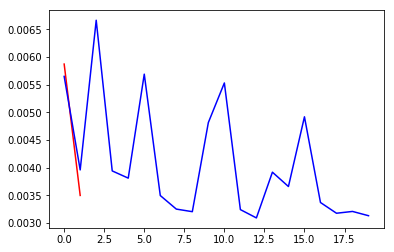

In [22]:
import time
import matplotlib.pyplot as plt

def cross(A,B):
    return [a+b for a in A for b in B]

digits = '123456789'
rows = 'ABCDEFGHI'
cols = digits
squares = cross(rows,cols)
unitlist = ([cross(rows,c) for c in cols] + 
            [cross(r,cols) for r in rows] +
            [cross(rs,cs) for rs in ('ABC','DEF','GHI') for cs in ('123','456','789')])
units = dict((s, [u for u in unitlist if s in u]) for s in squares)

peers = dict((s,set(sum(units[s],[]))-set([s])) for s in squares)

def test():
    assert len(squares) == 81
    assert len(unitlist) == 27
    assert all(len(units[s]) == 3 for s in squares)
    assert all(len(peers[s]) == 20 for s in squares)
    assert units['C2'] == [['A2','B2','C2','D2','E2','F2','G2','H2','I2'],
                          ['C1','C2','C3','C4','C5','C6','C7','C8','C9'],
                          ['A1','A2','A3','B1','B2','B3','C1','C2','C3']]
    assert peers['C2'] == set(['A2','B2','D2','E2','F2','G2','H2','I2',
                              'C1','C3','C4','C5','C6','C7','C8','C9',
                              'A1','A3','B1','B3'])
    print('All test pass.')
    
def parse_grid(grid):
    values = dict((s,digits) for s in squares)
    for s,d in grid_values(grid).items():
        if d in digits and not assign(values, s, d):
            return False
    return values

def grid_values(grid):
    chars = [c for c in grid if c in digits or c in '0.']
    assert len(chars) == 81
    return dict(zip(squares, chars))

def assign(values, s, d):
    other_values = values[s].replace(d,'')
    if all(eliminate(values, s, d2) for d2 in other_values):
        return values
    else:
        return False

def eliminate(values,s, d):
    if d not in values[s]:
        return values
    values[s] = values[s].replace(d,'')
    if len(values[s]) == 0:
        return False
    elif len(values[s]) == 1:
        d2 = values[s]
        if not all(eliminate(values, s2, d2) for s2 in peers[s]):
            return False
    for u in units[s]:
        dplaces = [s for s in u if d in values[s]]
        if len(dplaces) == 0:
            return False
        elif len(dplaces) == 1:
            if not assign(values, dplaces[0], d):
                return False
    return values

def display(values):
    width = 1+max(len(values[s]) for s in squares)
    line = '+'.join(['-'*(width*3)]*3)
    for r in rows:
        print(''.join(values[r+c].center(width)+('|' if c in '36' else '') for c in cols))
        if r in 'CF': print(line)
    print()
def search(values):
    "Using depth-first search and propagation, try all possible values."
    if values is False:
        return False ## Failed earlier
    if all(len(values[s]) == 1 for s in squares): 
        return values ## Solved!
    ## Chose the unfilled square s with the fewest possibilities
    n,s = min((len(values[s]), s) for s in squares if len(values[s]) > 1)
    return some(search(assign(values.copy(), s, d)) 
        for d in values[s])

def some(seq):
    "Return some element of seq that is true."
    for e in seq:
        if e: return e
    return False
l = 0
time_list2 = []
with open('easy_sudokus.txt') as f:
    for line in f:
        if l < 20:
            l += 1
            print(line)
            start = time.process_time()
            display(search(parse_grid(line)))
            end = time.process_time()
            time_list2.append(end-start)
            print("Time: ",(end-start))
            print('\n')
    print(time_list2)
    print(time_list)
    plt.plot(time_list,'r',time_list2,'b')
    plt.show();


In [6]:
from tabulate import tabulate

print(tabulate([['M',5],['N',6]],headers=['A','B']))

A      B
---  ---
M      5
N      6
